In [ ]:
'''IDS 566 - Advanced Text Analytics Business (41418) 2022 Spring
-------------------------------------------------------------------------------------------
HOMEWORK-2
Group 7:
------------------------------------------
Tuhina - 655777506
Urjit Amitvikram Kurulkar - 658597085
Chris Lazarus - 673773993

'''

In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import math
import string
import sys
import numpy as np
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
import matplotlib.pyplot as plt
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clazar5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clazar5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clazar5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
all_txt_files =[]
for file in Path(r"C:\Users\clazar5\Desktop\ATA IDS 566\textfiles").rglob("*.txt"):
     all_txt_files.append(file.parent / file.name)
# counts the length of the list
n_files = len(all_txt_files)
print("Number of files: ",n_files)
all_txt_files.sort()
all_txt_files[0]

all_docs = []
for txt_file in all_txt_files:
    with open(txt_file) as f:
        txt_file_as_string = f.read()
    all_docs.append(txt_file_as_string)
        
doc1= open(all_txt_files[0]).read()
doc2= open(all_txt_files[1]).read()
doc3= open(all_txt_files[2]).read()
doc4= open(all_txt_files[3]).read()
print("\nText File 1:\n")
print(doc1)
print("-------------------------------------------------------------------------------------------")
print("\nText File 2:\n")
print(doc2)
print("-------------------------------------------------------------------------------------------")
print("\nText File 3:\n")
print(doc3)
print("-------------------------------------------------------------------------------------------")
print("\nText File 4:\n")
print(doc4)

Number of files:  4

Text File 1:

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Ã‚Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet

In [50]:
def Rm_spl_char(document):
    doc_without_numspec = re.sub(r"[^a-zA-Z ]", "", document)
    return(doc_without_numspec)

doc1=Rm_spl_char(doc1)
doc2=Rm_spl_char(doc2)
doc3=Rm_spl_char(doc3)
doc4=Rm_spl_char(doc4)

def remove_stopwords(document):
    tokenized_doc = nltk.word_tokenize(document)
    remove = ['said', 'bn', 'it', 'But', 'For', 'take', 'in', 'The', 'G', 'say', 'A', 'Its', 'It', 'ie', 'BAs', 'AOLTime']
    total_list = stopwords.words('english') + remove
    stop_list = set(total_list )
    doc_w = []
    for w in tokenized_doc:
        if w not in stop_list:
            doc_w.append(w)
    return(doc_w)
 
# Use this to read file content as a stream:
result1=[]
result2=[]
result3=[]
result4=[]

# pass the sentence in the remove_stopwords function
result1.append(remove_stopwords(doc1))
result2.append(remove_stopwords(doc2))
result3.append(remove_stopwords(doc3))
result4.append(remove_stopwords(doc4))


In [51]:
def lemmatization(doc):
    wordnet_lemmatizer = WordNetLemmatizer()
    lem_wds=[]
    for wrd in doc:
        b=wordnet_lemmatizer.lemmatize(wrd, pos='v')
        lem_wds.append(b)
        #print ("{0:20}{1:20}".format(word,b))
    return lem_wds

leme1=(lemmatization(result1[0]))
leme2=(lemmatization(result2[0]))
leme3=(lemmatization(result3[0]))
leme4=(lemmatization(result4[0]))


print("Result: Text1 File")
print(leme1)
print("\nResult: Text2 File")
print(leme2)
print("\nResult: Text3 File")
print(leme3)
print("\nResult: Text4 File")
print(leme4)

Result: Text1 File
['Ad', 'sales', 'boost', 'Time', 'Warner', 'profitQuarterly', 'profit', 'US', 'media', 'giant', 'TimeWarner', 'jump', 'three', 'months', 'December', 'yearearlierThe', 'firm', 'one', 'biggest', 'investors', 'Google', 'benefit', 'sales', 'highspeed', 'internet', 'connections', 'higher', 'advert', 'sales', 'TimeWarner', 'fourth', 'quarter', 'sales', 'rise', 'profit', 'buoy', 'oneoff', 'gain', 'offset', 'profit', 'dip', 'Warner', 'Bros', 'less', 'users', 'Warner', 'Friday', 'own', 'searchengine', 'Google', 'internet', 'business', 'AOL', 'mix', 'fortunes', 'lose', 'subscribers', 'fourth', 'quarter', 'profit', 'lower', 'precede', 'three', 'quarter', 'However', 'company', 'AOLs', 'underlie', 'profit', 'exceptional', 'items', 'rise', 'back', 'stronger', 'internet', 'advertise', 'revenues', 'hop', 'increase', 'subscribers', 'offer', 'online', 'service', 'free', 'TimeWarner', 'internet', 'customers', 'try', 'sign', 'AOLs', 'exist', 'customers', 'highspeed', 'broadband', 'TimeW

In [52]:
def Tf_IDF(doc):
    list={}
    for word in doc:
        if word in list:
            list[word] = list[word] + 1
        else:
            list[word]=1
    return(list)

def relation_freq(title, freq):
    list={}
    for word in title:
        list[word] = 0
        for ref in freq:
            if (word == ref):
                if word in list:
                    list[word] = list[word] + 1
                
                else:
                    list[word] = 1
    return(list)


In [53]:
tf_first = Tf_IDF(leme1)
tf_second = Tf_IDF(leme2)
tf_third = Tf_IDF(leme3)
tf_fourth = Tf_IDF(leme4)


rel12 = relation_freq(leme1, leme2)
print("Relation frequency of Document 1 and Document 2:\n", rel12)
print("----------------------------------------------------------------------------------------------------------------")
rel13 = relation_freq(leme1, leme3)
rel14 = relation_freq(leme1, leme4)

rel21 = relation_freq(leme2, leme1)
print("\nRelation frequency of Document 2 and Document 3:\n", rel23)
print("----------------------------------------------------------------------------------------------------------------")
rel23 = relation_freq(leme2, leme3)
rel24 = relation_freq(leme2, leme4)

rel31 = relation_freq(leme3, leme1)
print("\nRelation frequency of Document 3 and Document 4:\n", rel34)
print("----------------------------------------------------------------------------------------------------------------")
rel32 = relation_freq(leme3, leme2)
rel34 = relation_freq(leme3, leme4)

rel41 = relation_freq(leme4, leme1)
print("\nRelation frequency of Document 4 and Document 1:\n", rel41)
print("----------------------------------------------------------------------------------------------------------------")
rel42 = relation_freq(leme4, leme2)
rel43 = relation_freq(leme4, leme3)



first = {**tf_first, **rel21, **rel31, **rel41}
second = {**rel12, **tf_second, **rel32, **rel42}
third = {**rel13, **rel23, **tf_third, **rel43}
fourth = {**rel14, **rel24, **rel34, **tf_fourth}

Relation frequency of Document 1 and Document 2:
 {'Ad': 0, 'sales': 0, 'boost': 1, 'Time': 0, 'Warner': 0, 'profitQuarterly': 0, 'profit': 0, 'US': 7, 'media': 0, 'giant': 0, 'TimeWarner': 0, 'jump': 0, 'three': 1, 'months': 4, 'December': 0, 'yearearlierThe': 0, 'firm': 1, 'one': 0, 'biggest': 0, 'investors': 0, 'Google': 0, 'benefit': 0, 'highspeed': 0, 'internet': 0, 'connections': 0, 'higher': 1, 'advert': 0, 'fourth': 0, 'quarter': 1, 'rise': 1, 'buoy': 0, 'oneoff': 0, 'gain': 1, 'offset': 0, 'dip': 0, 'Bros': 0, 'less': 0, 'users': 0, 'Friday': 1, 'own': 0, 'searchengine': 0, 'business': 0, 'AOL': 0, 'mix': 0, 'fortunes': 0, 'lose': 0, 'subscribers': 0, 'lower': 0, 'precede': 0, 'However': 0, 'company': 0, 'AOLs': 0, 'underlie': 0, 'exceptional': 0, 'items': 0, 'back': 1, 'stronger': 0, 'advertise': 0, 'revenues': 0, 'hop': 0, 'increase': 0, 'offer': 0, 'online': 0, 'service': 0, 'free': 0, 'customers': 0, 'try': 0, 'sign': 0, 'exist': 0, 'broadband': 0, 'also': 0, 'restate': 0,

In [54]:
df_final = pd.DataFrame([first, second, third, fourth])
df_final.index = ['D1','D2','D3','D4']
df_final

,Ad,sales,boost,Time,Warner,profitQuarterly,profit,US,media,giant,...,month,start,improvements,Club,World,flat,bed,share,four,pence
D1,1,4,2,1,3,1,9,3,1,1,...,0,0,0,0,0,0,0,0,0,0
D2,0,0,1,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
D3,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
D4,0,1,0,0,0,0,2,0,0,0,...,1,1,1,1,1,1,1,1,1,2


In [55]:
lda_model = LatentDirichletAllocation(n_components=10, max_iter = 5, learning_offset = 50, random_state=0, learning_method = 'online')
final_model = lda_model.fit(df_final)


In [56]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

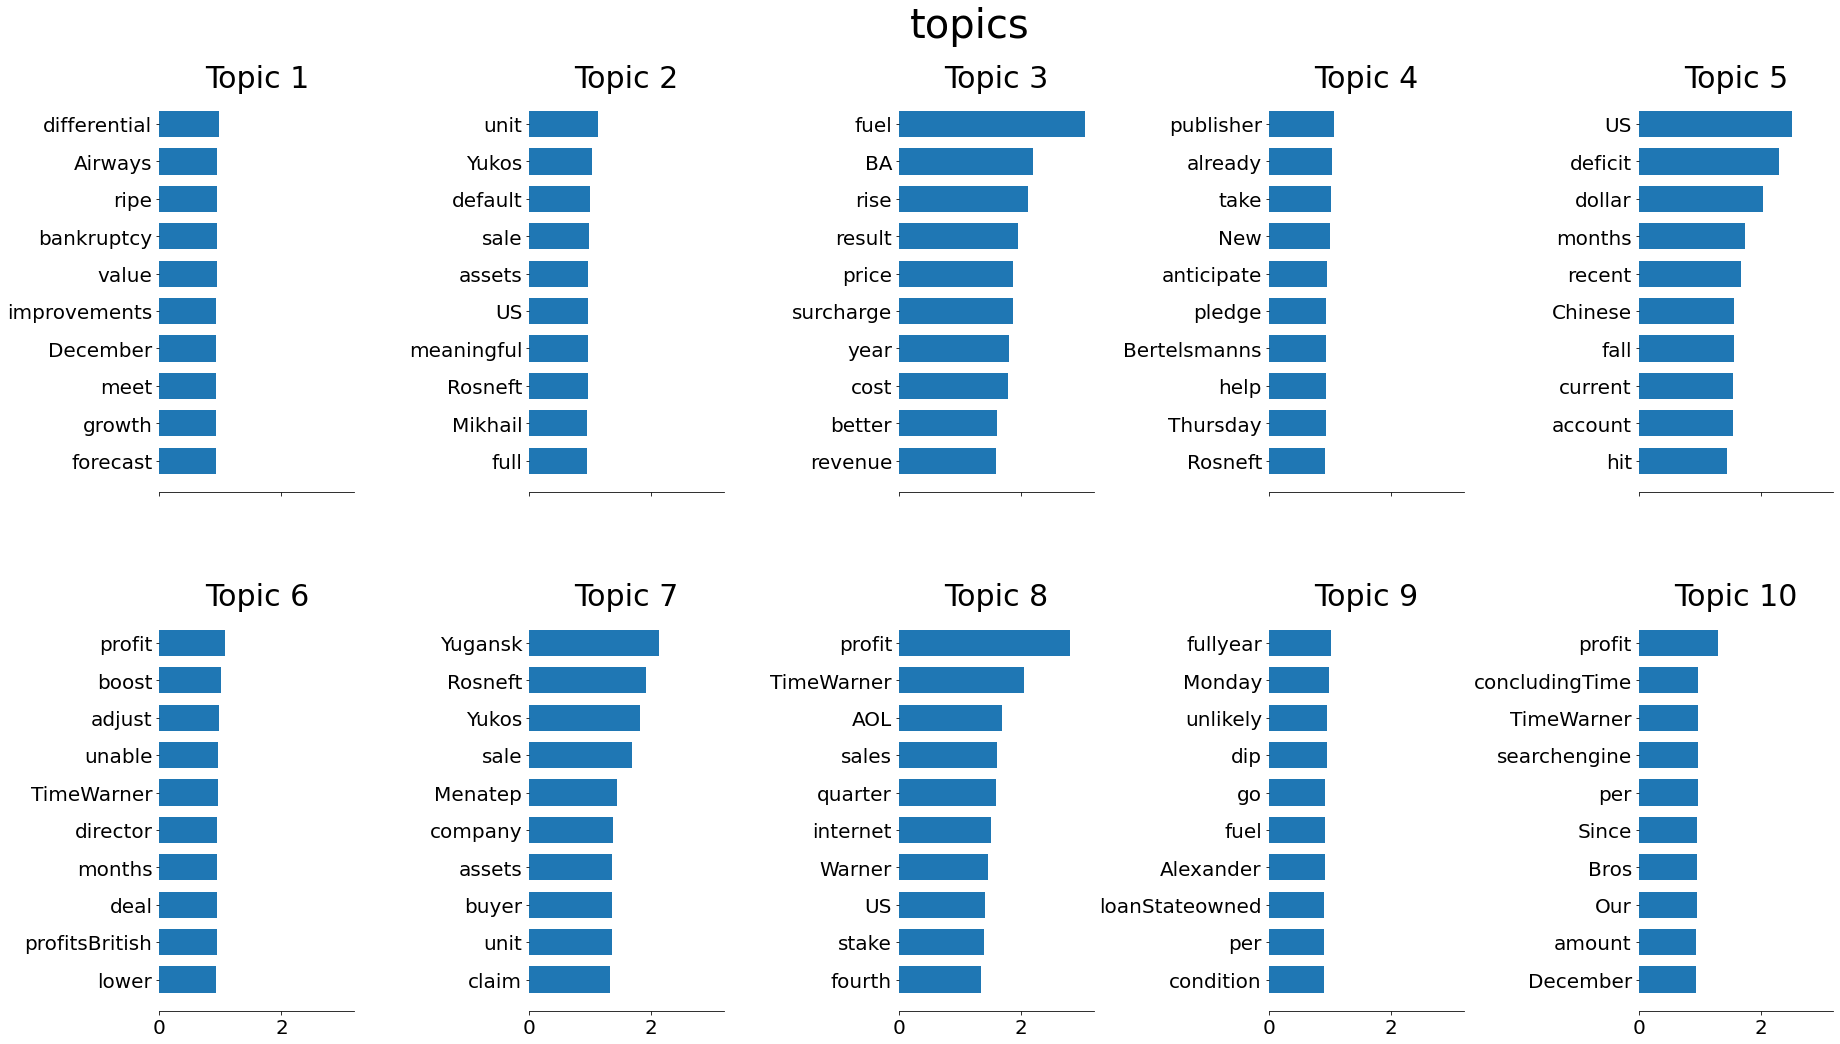

In [57]:
plot_top_words(final_model, df_final.columns, 10, "topics") #k=10 as given

In [58]:
ranks = []
n_top_words = 11

for i, topic in enumerate(final_model.components_):
    index = topic.argsort()[: -n_top_words : -1]
    features = [df_final.columns[i] for i in index]
    weights = topic[index]
    ranks.append(features)


df_rank=pd.DataFrame(ranks)
df_rank.index = ['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10']
df_rank.columns =['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5','Rank 6','Rank 7','Rank 8','Rank 9','Rank 10']
df_rank

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
Topic 1,differential,Airways,ripe,bankruptcy,value,improvements,December,meet,growth,forecast
Topic 2,unit,Yukos,default,sale,assets,US,meaningful,Rosneft,Mikhail,full
Topic 3,fuel,BA,rise,result,price,surcharge,year,cost,better,revenue
Topic 4,publisher,already,take,New,anticipate,pledge,Bertelsmanns,help,Thursday,Rosneft
Topic 5,US,deficit,dollar,months,recent,Chinese,fall,current,account,hit
Topic 6,profit,boost,adjust,unable,TimeWarner,director,months,deal,profitsBritish,lower
Topic 7,Yugansk,Rosneft,Yukos,sale,Menatep,company,assets,buyer,unit,claim
Topic 8,profit,TimeWarner,AOL,sales,quarter,internet,Warner,US,stake,fourth
Topic 9,fullyear,Monday,unlikely,dip,go,fuel,Alexander,loanStateowned,per,condition
Topic 10,profit,concludingTime,TimeWarner,searchengine,per,Since,Bros,Our,amount,December


In [59]:
prob_df = pd.DataFrame(final_model.transform(df_final))
prob_df

prob_df.columns =['probability of Topic 1','probability of Topic 2','probability of Topic 3','probability of Topic 4','probability of Topic 5','probability of Topic 6','probability of Topic 7','probability of Topic 8','probability of Topic 9','probability of Topic 10']
prob_df.index = ['D1','D2','D3','D4']

prob_df

,probability of Topic 1,probability of Topic 2,probability of Topic 3,probability of Topic 4,probability of Topic 5,probability of Topic 6,probability of Topic 7,probability of Topic 8,probability of Topic 9,probability of Topic 10
D1,0.000443,0.000443,0.000443,0.000443,0.000443,0.000443,0.000443,0.996017,0.000443,0.000443
D2,0.000439,0.000439,0.000439,0.000439,0.996052,0.000439,0.000439,0.000439,0.000439,0.000439
D3,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.993999,0.000667,0.000667,0.000667
D4,0.000445,0.000445,0.995999,0.000445,0.000445,0.000445,0.000445,0.000445,0.000445,0.000445


In [60]:
doc = [all_txt_files[0], all_txt_files[1] , all_txt_files[2], all_txt_files[3]]
# reading the text file
# This functio will return a
# list of the lines of text
# in the file.
def read_file(filename):
    try:
        with open(filename, 'r') as f:
            data = f.read()
        return data

    except IOError:
        print("Error opening or reading input file: ", filename)
        sys.exit()

# splitting the text lines into words
# translation table is a global variable
# mapping upper case to lower case and
# punctuation to spaces
translation_table = str.maketrans(string.punctuation+string.ascii_uppercase,
                                     " "*len(string.punctuation)+string.ascii_lowercase)

# returns a list of the words
# in the file
def get_words_from_line_list(text):
    text = text.translate(translation_table)
    word_list = text.split()
    return word_list


# counts frequency of each word
# returns a dictionary which maps
# the words to  their frequency.
def count_frequency(word_list):
    D = {}
    for new_word in word_list:
        if new_word in D:
            D[new_word] = D[new_word] + 1

        else:
            D[new_word] = 1

    return D

# returns dictionary of (word, frequency)
# pairs from the previous dictionary.
def word_frequencies_for_file(filename):
    line_list = read_file(filename)
    word_list = get_words_from_line_list(line_list)
    freq_mapping = count_frequency(word_list)
    return freq_mapping


# returns the dot product of two documents
def dotProduct(D1, D2):
    Sum = 0.0
    for key in D1:
        if key in D2:
            Sum += (D1[key] * D2[key])

    return Sum

# returns the angle in radians
# between document vectors
def vector_angle(D1, D2):
    numerator = dotProduct(D1, D2)
    denominator = math.sqrt(dotProduct(D1, D1)*dotProduct(D2, D2))
    return math.acos(numerator / denominator)




def documentSimilarity(filename_1, filename_2):
    sorted_word_list_1 = word_frequencies_for_file(filename_1)
    sorted_word_list_2 = word_frequencies_for_file(filename_2)
    distance = vector_angle(sorted_word_list_1, sorted_word_list_2)
    return distance
#    print("The distance between the documents " + filename_1 +" " + filename_2 + " is: % 0.6f "% distance)

# Driver code

cosine = []
index = ['D1 D2','D1 D3','D1 D4','D2 D3','D2 D4','D3 D4']


lent=len(doc)


for u in range(lent):
    for v in range(u,lent):
        if (u == v):
            continue

        else:
            cosine.append(documentSimilarity(doc[u],doc[v]))
            v=v+1
    u=u+1
#print(cosine)
df_1 = pd.DataFrame(data=index, columns = ['Articles'])
df_2 = pd.DataFrame(data=cosine,columns = ["Cosine"])

##print(df_1)
#print(df_2)
#df = pd.concat([df_1, df_2])
#print(pd.concat([df_1,df_2], axis = 1))

df = pd.concat([df_1,df_2], axis = 1)

#df.rename(columns = {"0" : "Articles", "0":"Cosine Similarity"})
#print(df)

df = df.sort_values(by = ['Cosine'])
df.index=[1,2,3,4,5,6]
df

,Articles,Cosine
1,D1 D4,0.784684
2,D1 D3,0.831855
3,D1 D2,0.841942
4,D2 D3,0.853590
5,D2 D4,0.919796
6,D3 D4,0.929324
